# 各类排序算法性能对比

### 排序算法复杂度整理

| 排序算法 | English | 时 间 复 杂 度 | 空 间 复 杂 度 |
| :---: | :---: | :---: | :---: |
| 冒泡排序 | BubbleSort | $O(n^2)$        | $O(1)$          |
| 选择排序 | SelectSort | $O(n^2)$        | $O(1)$          |
| 插入排序 | InsertSort | $O(n^2)$        | $O(1)$          |
| 希尔排序 | ShellSort  | $O(n^{1.5})$       | $O(1)$          |
| 快速排序 | QuickSort  | $O(Nlog_2N)$ | $O(Nlog_2N)$ |
| 归并排序 | MergeSort  | $O(Nlog_2N)$ | $O(1)$          |
| 堆排序   | HeapSort   | $O(Nlog_2N)$ | $O(1)$          |

### 初始化

In [1]:
import random
import copy, time
from sort import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 生成随机数
NumNumbers = 300
RandomNumbers = [random.uniform(0,10) for x in range(0,NumNumbers,1)]

# 待测试排序算法
SortList = [BubbleSort,SelectSort,InsertSort,QuickSort,ShellSort,MergeSort,HeapSort]

### 基本排序测试

In [2]:
for cSort in SortList:
    SortTestAll(cSort, RandomNumbers, PrintFlag=True)

BubbleSort:	SwapCount =      21161 ,	SearchCount =      89700,	Time Used:  0.072s
0.011,  0.058,  ...,  9.976,  9.978,  (min = 0.011, max = 9.978)

SelectSort:	SwapCount =        291 ,	SearchCount =      44850,	Time Used:  0.019s
0.011,  0.058,  ...,  9.976,  9.978,  (min = 0.011, max = 9.978)

InsertSort:	SwapCount =          0 ,	SearchCount =      21460,	Time Used:  0.012s
0.011,  0.058,  ...,  9.976,  9.978,  (min = 0.011, max = 9.978)

QuickSort:	SwapCount =        814 ,	SearchCount =       2530,	Time Used:  0.003s
0.011,  0.058,  ...,  9.976,  9.978,  (min = 0.011, max = 9.978)

ShellSort:	SwapCount =          0 ,	SearchCount =       3777,	Time Used:  0.004s
0.011,  0.058,  ...,  9.976,  9.978,  (min = 0.011, max = 9.978)

MergeSort:	SwapCount =          0 ,	SearchCount =       2375,	Time Used:  0.003s
0.011,  0.058,  ...,  9.976,  9.978,  (min = 0.011, max = 9.978)

HeapSort:	SwapCount =       2183 ,	SearchCount =      24378,	Time Used:  0.023s
0.011,  0.058,  ...,  9.976,  9.978

### MonteCarlo测试

***创建测试函数***

In [3]:
def SortTestAllRep(cSortList, NumLen = 100, Times = 10):
    # init
    keys = ['Swap','Search','Time']
    keysAvg = ['AvgSwap','AvgSearch','AvgTime']
    TestResult = {}
    for cSort in cSortList:
        TestResult[cSort.__name__] = dict.fromkeys(keys+keysAvg)
        for key, keyAvg in zip(keys, keysAvg):
            TestResult[cSort.__name__][key] = []
            TestResult[cSort.__name__][keyAvg] = 0
    
    # run tests
    for i in range(Times):
        RandomNumbers = [random.uniform(0,10) for x in range(0,NumLen,1)]
        for cSort in cSortList:
            result = SortTestAll(cSort, RandomNumbers, PrintFlag=False)
            for key in keys:
                TestResult[cSort.__name__][key].append(result[key])
    
    # analyse
    for cSort in cSortList:
        for key, keyAvg in zip(keys, keysAvg):
            TestResult[cSort.__name__][keyAvg] = sum(TestResult[cSort.__name__][key])/Times
    
    return TestResult

***测试算法***

In [5]:
# run test (cost a period of time, suggest run once)
TestResult = SortTestAllRep(SortList, NumLen = 1000, Times = 10)

In [6]:
# using pandas to analyse
dfTest = pd.DataFrame(TestResult).T
keysToAnalyse = ['AvgSearch','AvgSwap','AvgTime']
dfTestToPrint = dfTest.loc[:,keysToAnalyse]
print dfTestToPrint

           AvgSearch AvgSwap     AvgTime
BubbleSort    999000  249658      0.5773
HeapSort      258037    9042      0.2493
InsertSort    250657       0      0.1323
MergeSort       9714       0  0.00780001
QuickSort      10843    3049      0.0076
SelectSort    499500     993      0.2167
ShellSort      15681       0      0.0115


***作图分析***

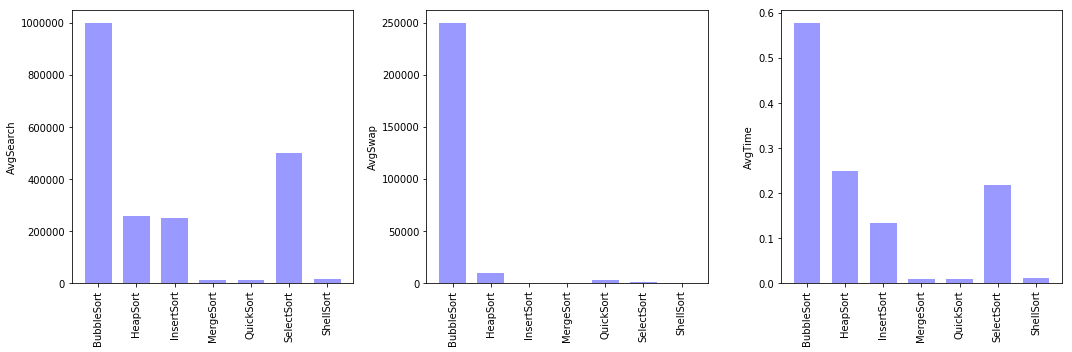

In [8]:
# parameters
NumAnalyse = len(keysToAnalyse)
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
bar_width = 0.7
opacity = 0.4

# bar plots
for i,key in zip(range(NumAnalyse),keysToAnalyse):
    data = dfTest.loc[:,key]
    ax = fig.add_subplot(1,NumAnalyse,i+1)
    index = np.arange(len(data))
    rects = plt.bar(index, data, bar_width,
                     alpha=opacity,
                     color='b')
    plt.ylabel(key)
    plt.xticks(index, dfTest.index, rotation=90)
    plt.legend()
    plt.tight_layout()
plt.show()